<a href="https://colab.research.google.com/github/rohitcricket/TensorFlow2.0-TransferLearningImageClassification/blob/master/Bonus_2_Transfer_Learning_for_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP #0: PROBLEM STATEMENT  

- Transfer learning is a machine learning technique in which intelligence (i.e.: weights) from a base artificial neural network is being transferred to a new network as a starting point to perform a specific task. 
- In this project, we will apply Transfer learning to repurpose trained weights from ResNet 50, which is a famous deep network, to perform classification tasks on a new datasets. 
- A pre-trained ResNet50 model that has been trained on ImageNet will be repurposed and used to classify new images of cats and dogs
- The new model will consist of two part: 
    - (1) "base" pre-trained network  
    - (2) "new dense network classifier"
- Citations: Olga Russakovsky, Jia Deng, Hao Su, Jonathan Krause, Sanjeev Satheesh, Sean Ma, Zhiheng Huang, Andrej Karpathy, Aditya Khosla, Michael Bernstein, Alexander C. Berg and Li Fei-Fei. (* = equal contribution) ImageNet Large Scale Visual Recognition Challenge. arXiv:1409.0575, 2014.
- Paper: https://arxiv.org/abs/1409.0575
- Data Source: https://www.kaggle.com/tongpython/cat-and-dog

# STEP #1: IMPORT LIBRARIES

In [0]:
!pip install tensorflow-gpu==2.0.0.alpha0

     |████████████████████████████████| 332.1MB 71kB/s 
     |████████████████████████████████| 419kB 41.9MB/s 
     |████████████████████████████████| 3.0MB 33.2MB/s 


In [0]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 


In [0]:
tf.__version__

'2.0.0-alpha0'

# STEP #2: IMPORT MODEL WITH PRE-TRAINED WEIGHTS

In [0]:
model = tf.keras.applications.ResNet50(weights = 'imagenet')

102858752/102853048 [==============================] - 1s 0us/step


# STEP #3: EVALUATE THE PRE-TRAINED MODEL (JUST TO BE SURE :)!)

- Check this out: http://www.image-net.org/synset?wnid=n02835271
- Search for Bicycle
- https://lear.inrialpes.fr/people/gordo/ImageNetResults/sift1000_accuracy_withPrior/results_sift_0253.htm

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Sample_Image= tf.keras.preprocessing.image.load_img(r'/content/drive/My Drive/Colab Notebooks/Transfer Learning Data/African_Elephant.jpg', target_size = (224, 224))

In [0]:
Sample_Image= tf.keras.preprocessing.image.load_img(r'/content/drive/My Drive/Colab Notebooks/Transfer Learning Data/bicycle.png', target_size = (224, 224))

In [0]:
Sample_Image = tf.keras.preprocessing.image.img_to_array(Sample_Image)

In [0]:
np.shape(Sample_Image)

(224, 224, 3)

W0902 03:08:46.843775 140531006052224 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


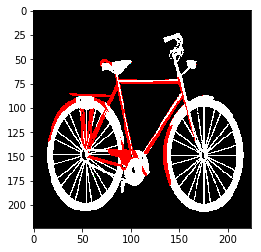

In [0]:
plt.imshow(Sample_Image)

In [0]:
Sample_Image = np.expand_dims(Sample_Image, axis = 0)
np.shape(Sample_Image)

(1, 224, 224, 3)

In [0]:
Sample_Image.max()

255.0

In [0]:
Sample_Image.min()

0.0

In [0]:
Sample_Image = tf.keras.applications.resnet50.preprocess_input(Sample_Image)

In [0]:
Sample_Image.max()

151.061

In [0]:
Sample_Image.min()

-123.68

In [0]:
predictions = model.predict(Sample_Image)

In [0]:
print('predictions:', tf.keras.applications.resnet50.decode_predictions(predictions, top = 5)[0])

predictions: [('n02835271', 'bicycle-built-for-two', 0.6637825), ('n03792782', 'mountain_bike', 0.05381947), ('n04482393', 'tricycle', 0.05224806), ('n03599486', 'jinrikisha', 0.017589984), ('n03930313', 'picket_fence', 0.00820201)]


# STEP #4: APPLY TRANSFER LEARNING AND RETRAIN THE MODEL

In [0]:
base_model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step


In [0]:
print(base_model.summary())

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, None, None, 6 256         conv1[0][0]                      
___________________________________________________________________________________________

In [0]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_2
1 conv1_pad
2 conv1
3 bn_conv1
4 activation_49
5 pool1_pad
6 max_pooling2d_1
7 res2a_branch2a
8 bn2a_branch2a
9 activation_50
10 res2a_branch2b
11 bn2a_branch2b
12 activation_51
13 res2a_branch2c
14 res2a_branch1
15 bn2a_branch2c
16 bn2a_branch1
17 add_16
18 activation_52
19 res2b_branch2a
20 bn2b_branch2a
21 activation_53
22 res2b_branch2b
23 bn2b_branch2b
24 activation_54
25 res2b_branch2c
26 bn2b_branch2c
27 add_17
28 activation_55
29 res2c_branch2a
30 bn2c_branch2a
31 activation_56
32 res2c_branch2b
33 bn2c_branch2b
34 activation_57
35 res2c_branch2c
36 bn2c_branch2c
37 add_18
38 activation_58
39 res3a_branch2a
40 bn3a_branch2a
41 activation_59
42 res3a_branch2b
43 bn3a_branch2b
44 activation_60
45 res3a_branch2c
46 res3a_branch1
47 bn3a_branch2c
48 bn3a_branch1
49 add_19
50 activation_61
51 res3b_branch2a
52 bn3b_branch2a
53 activation_62
54 res3b_branch2b
55 bn3b_branch2b
56 activation_63
57 res3b_branch2c
58 bn3b_branch2c
59 add_20
60 activation_64
61 res3c_branch2a
62

In [0]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [0]:
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
preds = tf.keras.layers.Dense(2, activation = 'softmax')(x)

In [0]:
model = tf.keras.models.Model(inputs = base_model.input, outputs = preds)

In [0]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, None, None, 6 256         conv1[0][0]                      
______________________________________________________________________________________________

In [0]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_2
1 conv1_pad
2 conv1
3 bn_conv1
4 activation_49
5 pool1_pad
6 max_pooling2d_1
7 res2a_branch2a
8 bn2a_branch2a
9 activation_50
10 res2a_branch2b
11 bn2a_branch2b
12 activation_51
13 res2a_branch2c
14 res2a_branch1
15 bn2a_branch2c
16 bn2a_branch1
17 add_16
18 activation_52
19 res2b_branch2a
20 bn2b_branch2a
21 activation_53
22 res2b_branch2b
23 bn2b_branch2b
24 activation_54
25 res2b_branch2c
26 bn2b_branch2c
27 add_17
28 activation_55
29 res2c_branch2a
30 bn2c_branch2a
31 activation_56
32 res2c_branch2b
33 bn2c_branch2b
34 activation_57
35 res2c_branch2c
36 bn2c_branch2c
37 add_18
38 activation_58
39 res3a_branch2a
40 bn3a_branch2a
41 activation_59
42 res3a_branch2b
43 bn3a_branch2b
44 activation_60
45 res3a_branch2c
46 res3a_branch1
47 bn3a_branch2c
48 bn3a_branch1
49 add_19
50 activation_61
51 res3b_branch2a
52 bn3b_branch2a
53 activation_62
54 res3b_branch2b
55 bn3b_branch2b
56 activation_63
57 res3b_branch2c
58 bn3b_branch2c
59 add_20
60 activation_64
61 res3c_branch2a
62

In [0]:
for layer in model.layers[:175]:
    layer.trainable = False

In [0]:
for layer in model.layers[175:]:
    layer.trainable = True

In [0]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function= tf.keras.applications.resnet50.preprocess_input)

train_generator = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/Transfer Learning Data/train/', 
                                                   target_size = (224, 224),
                                                   color_mode = 'rgb',
                                                   batch_size = 32,
                                                   class_mode = 'categorical',
                                                   shuffle = True)

Found 202 images belonging to 2 classes.


In [0]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
history = model.fit_generator(generator = train_generator, steps_per_epoch=train_generator.n//train_generator.batch_size, epochs = 5)

Epoch 1/5
6/6 [==============================] - 37s 6s/step - loss: 1.4659 - accuracy: 0.5235
Epoch 2/5
6/6 [==============================] - 8s 1s/step - loss: 0.5297 - accuracy: 0.7059
Epoch 3/5
6/6 [==============================] - 1s 241ms/step - loss: 0.1155 - accuracy: 0.9765
Epoch 4/5
6/6 [==============================] - 2s 269ms/step - loss: 0.0806 - accuracy: 0.9792
Epoch 5/5
6/6 [==============================] - 1s 241ms/step - loss: 0.0336 - accuracy: 0.9824


# STEP #5: EVALUATE THE MODEL

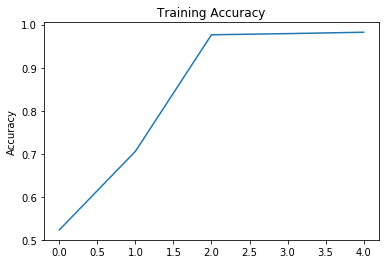

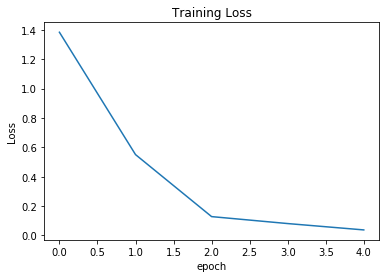

In [0]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure()
plt.plot(acc, label='Training Accuracy')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.figure()

plt.plot(loss, label='Training Loss')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

In [0]:
Sample_Image= tf.keras.preprocessing.image.load_img(r'/content/drive/My Drive/Colab Notebooks/Transfer Learning Data/cat.282.jpg', target_size = (224, 224))

In [0]:
# Sample_Image= tf.keras.preprocessing.image.load_img(r'/content/drive/My Drive/Colab Notebooks/Transfer Learning Data/dog.309.jpg', target_size = (224, 224))

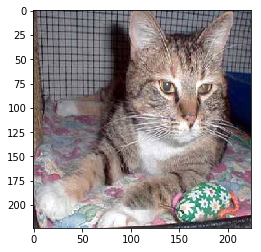

In [0]:
plt.imshow(Sample_Image)

In [0]:
Sample_Image = tf.keras.preprocessing.image.img_to_array(Sample_Image)
np.shape(Sample_Image)

(224, 224, 3)

In [0]:
Sample_Image = np.expand_dims(Sample_Image, axis = 0)


In [0]:
Sample_Image = tf.keras.applications.resnet50.preprocess_input(Sample_Image)
predictions = model.predict(Sample_Image)
print('Predictions:', predictions)

Predictions: [[1.0000000e+00 2.0187722e-08]]


# GREAT JOB!